C:\Users\vhoffman\AppData\Local\Temp\ipykernel_18468\2727639421.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


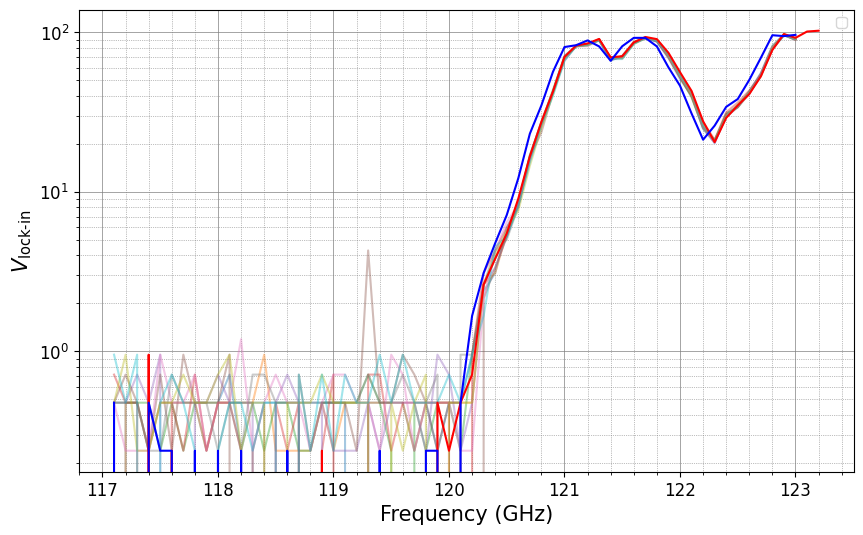

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens1.csv')
df2 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens2.csv')
df3 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens3.csv')
df4 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens4.csv')
df5 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens5.csv')
df6 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens6.csv')
df7 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens7.csv')
df8 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens8.csv')
df9 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens9.csv')
df10 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_sens10.csv')
df_new = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_secondrun_sens1.csv')
df_new2 = pd.read_csv('../Data/Sensitivity_140GHz_Test/Tables/f_vs_vlockin_140Ghz_secondrun_sens2.csv')
df_combined = pd.concat([df1[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df2[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df3[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df4[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df5[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df6[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df7[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df8[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df9[['Desired Frequency (GHz)', 'Vlockin (microvolts)']],
                         df10[['Desired Frequency (GHz)', 'Vlockin (microvolts)']]])
median_df = df_combined.groupby('Desired Frequency (GHz)')['Vlockin (microvolts)'].median().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df1['Desired Frequency (GHz)'], df1['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df2['Desired Frequency (GHz)'], df2['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df3['Desired Frequency (GHz)'], df3['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df4['Desired Frequency (GHz)'], df4['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df5['Desired Frequency (GHz)'], df5['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df6['Desired Frequency (GHz)'], df6['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df7['Desired Frequency (GHz)'], df7['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df8['Desired Frequency (GHz)'], df8['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df9['Desired Frequency (GHz)'], df9['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df10['Desired Frequency (GHz)'], df10['Vlockin (microvolts)'], alpha = 0.4)
plt.plot(df_new['Desired Frequency (GHz)']+.2, df_new['Vlockin (microvolts)'], color = 'red')
plt.plot(df_new2['Desired Frequency (GHz)'], df_new2['Vlockin (microvolts)'], color = 'blue')
#plt.plot(median_df['Desired Frequency (GHz)'], median_df['Vlockin (microvolts)'], label='Median', color='black')
plt.yscale('log')
plt.xlabel('Frequency (GHz)', fontsize = 15 )
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}}$', fontsize = 15)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('../Data/Sensitivity_140GHz_Test/Plots/f_vs_vlockin_all.png')
plt.show()

In [17]:
tolerance = 0.0001
frequency_range = np.arange(120.1, 121.1, 0.1)
std_devs = {}

for frequency_point in frequency_range:
    filtered_data = df_combined[(df_combined['Desired Frequency (GHz)'] >= frequency_point - tolerance) &
                                (df_combined['Desired Frequency (GHz)'] <= frequency_point + tolerance)]
    std_dev = filtered_data['Vlockin (microvolts)'].std()
    std_devs[frequency_point] = std_dev
for freq, std_dev in std_devs.items():
    print(f"STD {freq} GHz:{std_dev} microvolts")

STD 120.1 GHz:0.2525708442679664 microvolts
STD 120.19999999999999 GHz:0.3563037928513158 microvolts
STD 120.29999999999998 GHz:0.3901485077989891 microvolts
STD 120.39999999999998 GHz:0.5506093292475569 microvolts
STD 120.49999999999997 GHz:0.4502667899281738 microvolts
STD 120.59999999999997 GHz:0.30158009589493767 microvolts
STD 120.69999999999996 GHz:0.7476419853260134 microvolts
STD 120.79999999999995 GHz:1.1744715693545853 microvolts
STD 120.89999999999995 GHz:1.038918811072356 microvolts
STD 120.99999999999994 GHz:1.6972592421639996 microvolts
